In [1]:
# Modules
import numpy as np
import xarray as xr
import pandas as pd

from data import data_loader
from data import gesla_preprocessing
from data import era5_preprocessing
from data import preprocessing

In [2]:
# ---
# Preprocessing
# ---

# Get timeseries of predictor and predictand
percentile = 0.95
predictors = ["sp", "tp", "u10", "v10",]
predictor = "sp"
season = "winter"

X, Y, t = preprocessing.preprocessing1(season, predictor, percentile)

# Handle NaN values: 
# Insert numerical value that is not in data.
# ML will hopefully recognize it.
X[np.where(np.isnan(X))] = -999

# Save number of lat/lon for interpreting model output later
ndim = X.shape[0]
nlat = X.shape[1]
nlon = X.shape[2]

# Prepare shape for model
X = X.reshape(ndim, -1) # (ndim, nclasses)
y = Y[:, 0] # Select only one station

Load ERA5-Predictor: sp in region: lon-0530_lat7040 for years: 1999-2008 in season: winter
Load Predictand from GESLA
Applied one-hot-encoding
Get overlapping timeseries of ERA5 and GESLA


In [3]:
#---
# Train Model
#---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

# Setup Model

model = RandomForestClassifier(criterion='gini',
n_estimators=91, #- nTrees 
max_depth=9, 
random_state=0, # To compare results when changing hyperparameters
class_weight="balanced",
oob_score=True,
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=91,
                       oob_score=True, random_state=0)

In [4]:
#---
# Evaluate model / Diagnostic
#--- 
# Score & Importance
test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)
importances = model.feature_importances_

print(f"test_score: {test_score}")
print(f"train_score: {train_score}")
print(f"importances: {importances}")

test_score: 0.8982300884955752
train_score: 0.9556868537666174
importances: [0.00000000e+00 1.72891519e-04 2.81572627e-20 ... 4.34961487e-04
 0.00000000e+00 0.00000000e+00]


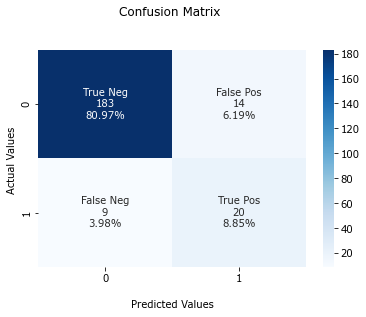

In [5]:
%matplotlib inline
#---
#  Diagnostics
#---

# Confusion matrix
#---
# Format: 
# Reality / Model: Negative, Positive
# Negative    Right Negative, False Positive 
# Positive    False Negative, Right Positive

from sklearn.metrics import confusion_matrix
from models.evaluation import plot_cf

y_test_pred = model.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_test_pred)

cfm_fig = plot_cf(cf_matrix)

# folder = "results/"
# fname = f"{folder}cf_matrix.png"
# cfm_fig.savefig(fname)

AUC: 0.8767722737615964


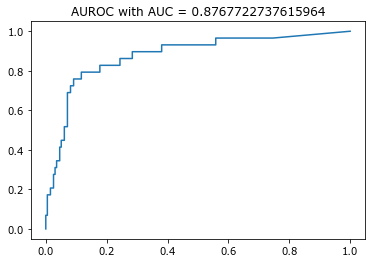

In [6]:
# AUROC
# Receiver Operating Characteristics & Area Under the Curve
#---
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_test_proba = model.predict_proba(X_test)[:, 1] # Prob. for predicting 0 or 1, we only need second col

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc = roc_auc_score(y_test, y_test_proba)

print(f'AUC: {auc}')

fig, ax = plt.subplots()

plt.plot(fpr, tpr)
plt.title(f"AUROC with AUC = {auc}")
plt.show()

Load ERA5-Predictor: sp in region: lon-0530_lat7040 for years: 1999-2008 in season: winter
Load Predictand from GESLA
Applied one-hot-encoding
Get overlapping timeseries of ERA5 and GESLA


C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\1236993694.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\1236993694.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\1236993694.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\1236993694.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Load ERA5-Predictor: tp in region: lon-0530_lat7040 for years: 1999-2008 in season: winter
Load Predictand from GESLA
Applied one-hot-encoding
Get overlapping timeseries of ERA5 and GESLA


C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\1236993694.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\1236993694.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\1236993694.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\1236993694.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Load ERA5-Predictor: u10 in region: lon-0530_lat7040 for years: 1999-2008 in season: winter
Load Predictand from GESLA
Applied one-hot-encoding
Get overlapping timeseries of ERA5 and GESLA


C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\1236993694.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\1236993694.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\1236993694.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\1236993694.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Load ERA5-Predictor: v10 in region: lon-0530_lat7040 for years: 1999-2008 in season: winter
Load Predictand from GESLA
Applied one-hot-encoding
Get overlapping timeseries of ERA5 and GESLA


C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\1236993694.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\1236993694.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\1236993694.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\1236993694.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


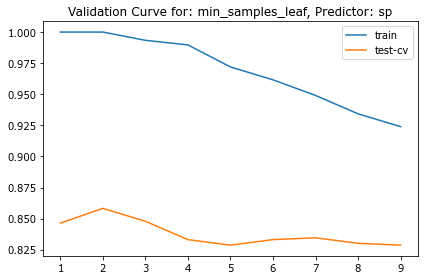

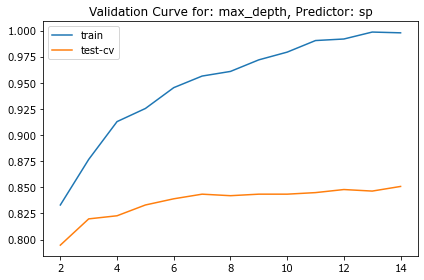

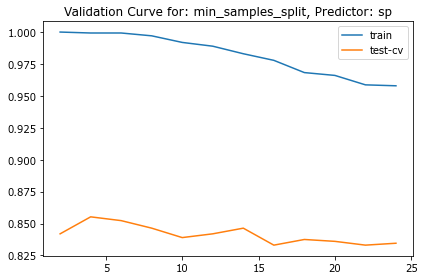

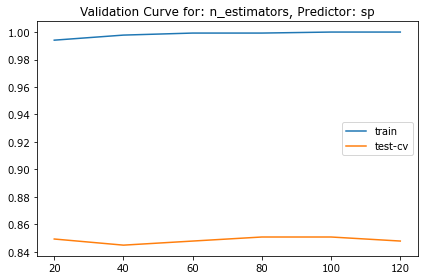

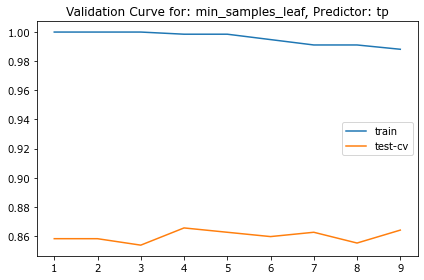

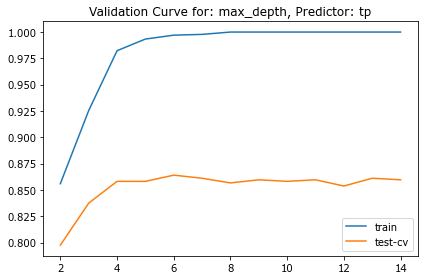

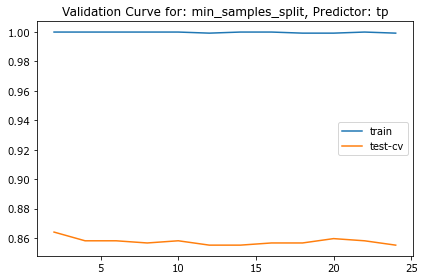

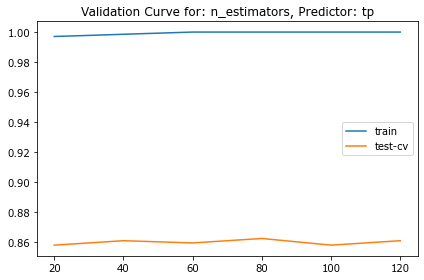

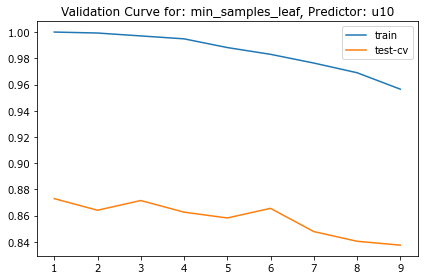

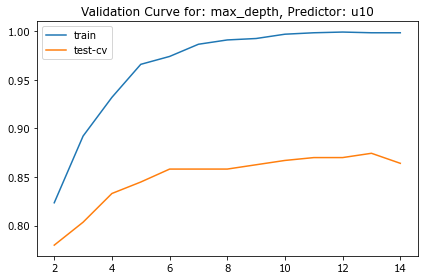

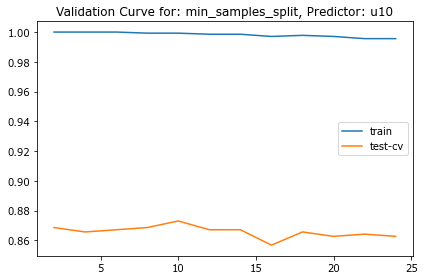

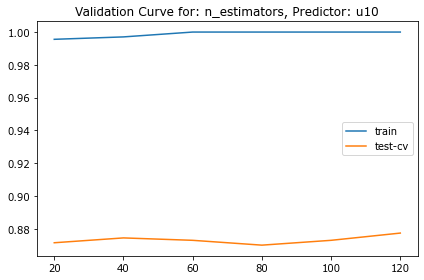

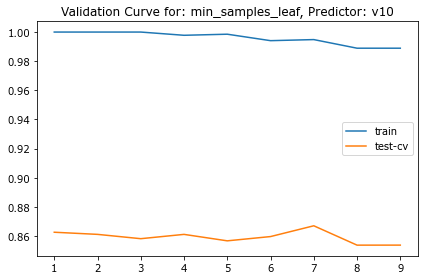

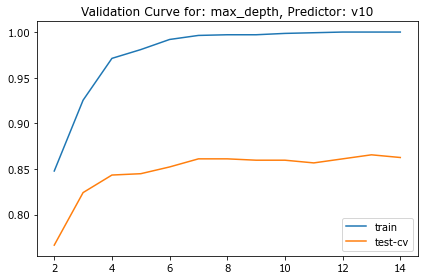

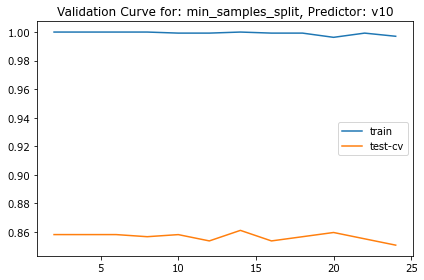

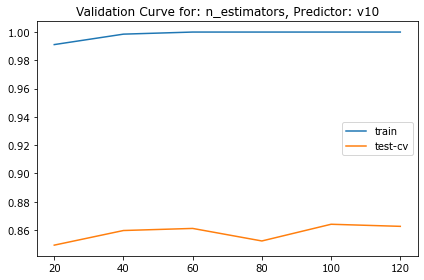

In [57]:
# ---
# Preprocessing
# ---

# Get timeseries of predictor and predictand
percentile = 0.95
predictors = ["sp", "tp", "u10", "v10",]
season = "winter"

# Hyperparameters to optimize
param_name = ('min_samples_leaf', "max_depth", "min_samples_split", "n_estimators",)
param_range = (np.arange(0, 10, 1), np.arange(2, 15, 1), np.arange(2, 25, 2), np.arange(0, 140, 20),)
hparams = dict(zip(param_name, param_range))


for predictor in predictors:
    X, Y, t = preprocessing.preprocessing1(season, predictor, percentile)

    # Handle NaN values: 
    # Insert numerical value that is not in data.
    # ML will hopefully recognize it.
    X[np.where(np.isnan(X))] = -999

    # Save number of lat/lon for interpreting model output later
    ndim = X.shape[0]
    nlat = X.shape[1]
    nlon = X.shape[2]

    # Prepare shape for model
    X = X.reshape(ndim, -1) # (ndim, nclasses)
    y = Y[:, 0] # Select only one station

    #---
    # Optimization: Hyperparameters with Validation Curve
    #---

    # Train-Test Split
    from sklearn.ensemble import RandomForestClassifier

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

    from sklearn.model_selection import validation_curve
    import numpy as np

    for param_name, param_range in hparams.items():
        train_scores, test_scores = validation_curve(
        estimator=RandomForestClassifier(criterion="gini",
        class_weight="balanced",
        ),
        X=X_train,
        y=y_train,
        param_name=param_name, #- varying for this parameter
        param_range=param_range, #- for this parameters
        cv=3,
        )
        
        import matplotlib.pyplot as plt

        fig, ax = plt.subplots(tight_layout=True)

        ax.plot(param_range, np.mean(train_scores, axis=1), label='train')
        ax.plot(param_range, np.mean(test_scores, axis=1), label='test-cv')
        ax.set_title(f"Validation Curve for: {param_name}, Predictor: {predictor}")
        ax.legend()

        fig.show()

        folder = "results/random_forest/rf001/"
        fname = f"vc_{param_name}_{predictor}"
        fig.savefig(f"{folder}{fname}.jpg")

In [34]:
#---
# Optimization: Hyperparameters with Validation Curve
#---

# Train-Test Split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

from sklearn.model_selection import validation_curve
import numpy as np 

param_range = np.arange(0, 10, 1)
param_name = 'min_samples_leaf'

train_scores, test_scores = validation_curve(
    estimator=RandomForestClassifier(criterion="gini",
    class_weight="balanced",
    oob_score=True,
    ),
    X=X_train,
    y=y_train,
    param_name=param_name, #- varying for this parameter
    param_range=param_range, #- for this parameters
    cv=3, 
)


C:\Users\Kai\AppData\Local\Temp\ipykernel_16108\2274057544.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


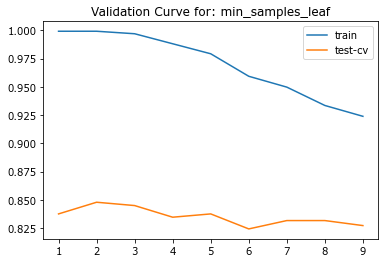

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(tight_layout=True)

ax.plot(param_range, np.mean(train_scores, axis=1), label='train')
ax.plot(param_range, np.mean(test_scores, axis=1), label='test-cv')
ax.set_title(f"Validation Curve for: {param_name}")
ax.legend()

fig.show()

In [36]:
folder = "results/random_forest/rf001/"
fname = f"vc_{param_name}"
fig.savefig(f"{folder}{fname}.jpg")

In [16]:
#---
# Optimization: Hyperparameters with GridSearch
#---

# Build Pipeline
#---
from sklearn.pipeline import Pipeline

max_depth = 9

pipeline = Pipeline([
    ("rf", RandomForestClassifier(criterion='gini',
n_estimators=91, #- nTrees 
max_depth=max_depth, 
random_state=0, # To compare results when changing hyperparameters
class_weight="balanced",
oob_score=True,)),
])

# pipeline.set_params(knn__n_neighbors = 1) # To change parameters

# Apply GridSearch
#---
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipeline, param_grid = {
    "rf__max_depth": np.arange(1, 10),
    "rf__n_estimators": np.arange(90, 100),
})

clf.fit(X_train, y_train)

# Display params
#---
print(clf.best_params_)

print(clf.score(X_test, y_test)) # Accuracy on basis of test data

print(clf.best_score_) # Accuracy based on k-fold cross-validation

{'rf__max_depth': 9, 'rf__n_estimators': 91}
0.8982300884955752
0.8404793028322441


Import Modules

Description 

Model: Random Forest
Predictand: Classification (0,1)
Percentile Predictand: 0.95
Predictors: sp 
Seaon: winter
Preprocessing: preprocessing1
Start Preprocessing of Data


Load ERA5-Predictor: sp in region: lon-0530_lat7040 for years: 1999-2008 in season: winter
Load Predictand from GESLA
Applied one-hot-encoding
Get overlapping timeseries of ERA5 and GESLA
Start model training

Evaluate Model 

test_score: 0.8982300884955752
train_score: 0.9556868537666174
importances: [0.00000000e+00 1.72891519e-04 2.81572627e-20 ... 4.34961487e-04
 0.00000000e+00 0.00000000e+00]
Show Confusion Matrix 



d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf001.py:100: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig.show()


Show AUROC 

AUC: 0.8767722737615964


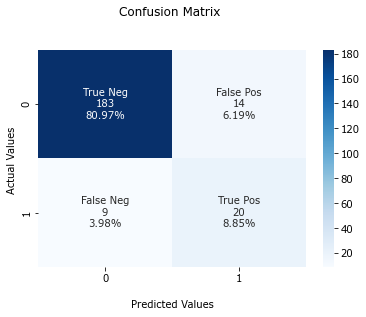

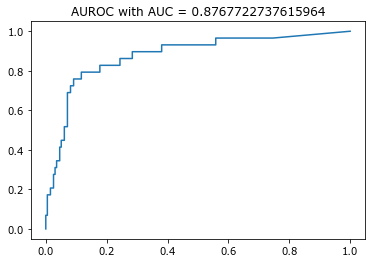

End of Model run


In [ ]:
#---
# Execute a whole experiment
#---
from models.random_forest import rf001

rf001.run()

In [ ]:
# Postprocessing

In [ ]:
# Visualization